# Feature Scaling:

## Standardization:

**Def**
*Standardization is a technique to standardization the independent feature present in the data in fixed range.*

Change the range of data without altering the shape of its distribution.

-------

There are two types of Feature Scaling:

1. Standardization.
2. Normalization.

-------

**Formula**

xi`=xi-x'/sigma

xi=value,
x'=mean, 
sigma=Standerd deviation.

--------

**NOTE**
When you done Standardization always check that column the mean = 0 and the SD = 1.

--------

**Where to use Standardization**

K-means,KNN,ANN,PCA,Gradient Desend.

**Where not to use Standardization**

Decision tree,Random Forest,Gradient Boost,Xg boost.

## Import Libaraies:

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load dataset:

In [54]:
df=pd.read_csv('../Data/Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [55]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [56]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

**So there very minimal missing values its up to you,you can remove them or fill them** 

In [57]:
df.dropna(inplace=True)

In [58]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [59]:
df=df.select_dtypes(include=['number'])

In [60]:
df

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
6699,49.0,20.0,200000.0
6700,32.0,3.0,50000.0
6701,30.0,4.0,55000.0
6702,46.0,14.0,140000.0


**Train test split**

In [61]:
X=df[['Age','Salary']]
y=df

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

X_train.shape,X_test.shape

((5358, 2), (1340, 2))

**Standard scaler**

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

scaler.fit(X_train)

Xtrain_scale=scaler.transform(X_train)
Xtest_scale=scaler.transform(X_test)

Xtrain_scale,Xtest_scale

(array([[ 0.06326621, -1.22813409],
        [-0.86327123, -1.22813409],
        [-0.86327123, -1.22813409],
        ...,
        [ 0.32799119,  1.04612858],
        [ 2.04870358,  1.61469425],
        [-0.99563372, -0.47302202]]),
 array([[-0.73090874, -1.0386122 ],
        [ 0.59271617,  0.09851914],
        [-1.12799621, -1.0386122 ],
        ...,
        [-0.46618376, -1.70193881],
        [ 0.85744115, -0.28052464],
        [-0.33382127,  1.5199333 ]]))

**Now convert array into dataframe.**

In [65]:
Xtrain_scale=pd.DataFrame(Xtrain_scale,columns=X_train.columns)
Xtest_scale=pd.DataFrame(Xtest_scale,columns=X_test.columns)

Xtrain_scale,Xtest_scale

(           Age    Salary
 0     0.063266 -1.228134
 1    -0.863271 -1.228134
 2    -0.863271 -1.228134
 3     1.254529  1.425172
 4    -0.730909 -1.512417
 ...        ...       ...
 5353  0.195629 -0.375286
 5354 -0.863271 -1.569273
 5355  0.327991  1.046129
 5356  2.048704  1.614694
 5357 -0.995634 -0.473022
 
 [5358 rows x 2 columns],
            Age    Salary
 0    -0.730909 -1.038612
 1     0.592716  0.098519
 2    -1.127996 -1.038612
 3     0.195629  0.477563
 4     1.254529  1.330411
 ...        ...       ...
 1335 -0.598546 -0.659568
 1336  0.063266  0.477563
 1337 -0.466184 -1.701939
 1338  0.857441 -0.280525
 1339 -0.333821  1.519933
 
 [1340 rows x 2 columns])

**Check as i mentioned mean and SD**

In [66]:
np.round(Xtrain_scale.describe(),1)

,Age,Salary
count,5358.0,5358.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.7,-2.2
25%,-0.7,-0.8
50%,-0.2,0.0
75%,0.6,0.9
max,3.8,2.6


**Make scatter to check is there only scale is changed od distribution also changed**

Text(0.5, 1.0, 'After Scaling')

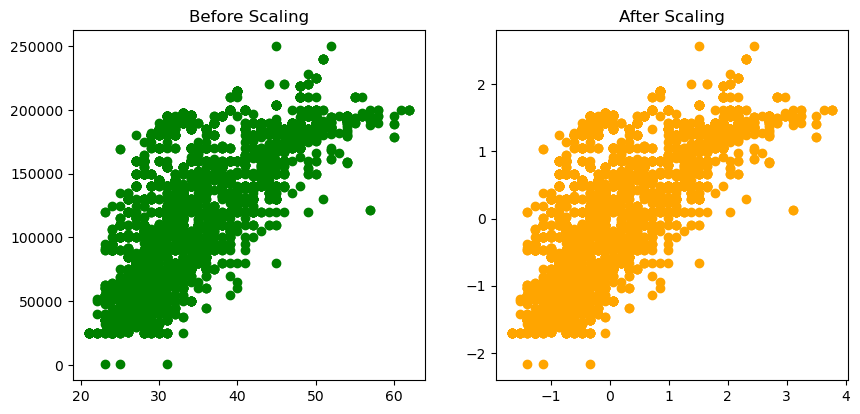

In [72]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)

#Before scaling
plt.scatter(X_train['Age'],X_train['Salary'],color='Green')
plt.title('Before Scaling')

#After scaling
ax,plt.subplot(2,2,2)
plt.scatter(Xtrain_scale['Age'],Xtrain_scale['Salary'],color='orange')
plt.title('After Scaling')

**We see only scale is change no more confirmation we make kde plot to check the distribution**

c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1

Text(0.5, 1.0, 'After Scaling')

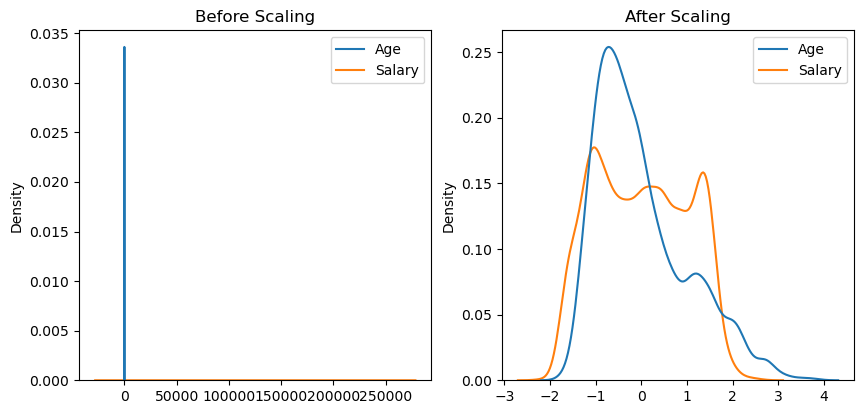

In [74]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)

#Before scaling
sns.kdeplot(X_train)
plt.title('Before Scaling')

#After scaling
ax,plt.subplot(2,2,2)
sns.kdeplot(Xtrain_scale)
plt.title('After Scaling')

**We can use logistic regression for see the benefits of Standardization**